# Insurance Prediction

# Variable	Definition

1.  **id** : Unique ID of the policy

1.  **perc_premium_paid_by_cash_credit** : Percentage of premium amount paid by cash or credit card

1.  **age_in_days** : Age in days of policy holder

1.  **Income** : Monthly Income of policy holder

1.  **Count_3-6_months_late** : No of premiums late by 3 to 6 months

1.  **Count_6-12_months_late** : No  of premiums late by 6 to 12 months

1.  **Count_more_than_12_months_late** : No of premiums late by more than 12 months

1.  **application_underwriting_score** : Underwriting Score of the applicant at the time of application (No applications under the score of 90 are insured)

1.  **no_of_premiums_paid** : Total premiums paid on time till now

1.  **sourcing_channel** : Sourcing channel for application

1.  **residence_area_type** : Area type of Residence (Urban/Rural)

1.  **target** : 1 - premium paid on time, 0 - otherwise


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("instat.csv")

In [3]:
data

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,1


In [4]:
data.shape

(79853, 12)

In [5]:
data = data.drop(['id'],axis=1)   #dropping the id column.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
perc_premium_paid_by_cash_credit,79853.0,0.314288,0.334915,0.0,0.034,0.167,0.538,1.00
age_in_days,79853.0,18846.696906,5208.719136,7670.0,14974.000,18625.000,22636.000,37602.00
Income,79853.0,208847.171177,496582.597257,24030.0,108010.000,166560.000,252090.000,90262600.00
Count_3-6_months_late,79756.0,0.248671,0.691468,0.0,0.000,0.000,0.000,13.00
Count_6-12_months_late,79756.0,0.078188,0.436507,0.0,0.000,0.000,0.000,17.00
Count_more_than_12_months_late,79756.0,0.060008,0.312023,0.0,0.000,0.000,0.000,11.00
application_underwriting_score,76879.0,99.067291,0.739799,91.9,98.810,99.210,99.540,99.89
no_of_premiums_paid,79853.0,10.863887,5.170687,2.0,7.000,10.000,14.000,60.00
target,79853.0,0.937410,0.242226,0.0,1.000,1.000,1.000,1.00


In [7]:
data.isnull().sum()

perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64
 1   age_in_days                       79853 non-null  int64  
 2   Income                            79853 non-null  int64  
 3   Count_3-6_months_late             79756 non-null  float64
 4   Count_6-12_months_late            79756 non-null  float64
 5   Count_more_than_12_months_late    79756 non-null  float64
 6   application_underwriting_score    76879 non-null  float64
 7   no_of_premiums_paid               79853 non-null  int64  
 8   sourcing_channel                  79853 non-null  object 
 9   residence_area_type               79853 non-null  object 
 10  target                            79853 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 6.7+ MB


# Data Analysis

## age_in_days

In [9]:
data.age_in_days.describe()

count    79853.000000
mean     18846.696906
std       5208.719136
min       7670.000000
25%      14974.000000
50%      18625.000000
75%      22636.000000
max      37602.000000
Name: age_in_days, dtype: float64

## Finding age_in_years

In [10]:
data['age_in_years'] = data['age_in_days'].apply(lambda x: x//365)

In [11]:
data.age_in_years.describe(percentiles=[0,.25,.5,.75,.9,1])

count    79853.000000
mean        51.607404
std         14.270484
min         21.000000
0%          21.000000
25%         41.000000
50%         51.000000
75%         62.000000
90%         71.000000
100%       103.000000
max        103.000000
Name: age_in_years, dtype: float64

In [12]:
data = data.drop(['age_in_days'],axis=1)

In [13]:
data.query('age_in_years > 99')

,perc_premium_paid_by_cash_credit,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age_in_years
5045,0.010,99060,0.0,0.0,0.0,99.89,5,A,Urban,1,102
19085,0.110,102580,0.0,0.0,0.0,99.27,9,B,Urban,1,102
26029,0.026,50050,0.0,0.0,0.0,99.87,7,A,Rural,1,101
38401,0.003,86570,2.0,0.0,0.0,NaN,8,A,Rural,0,101
38441,1.000,48130,0.0,0.0,0.0,NaN,5,A,Rural,1,103


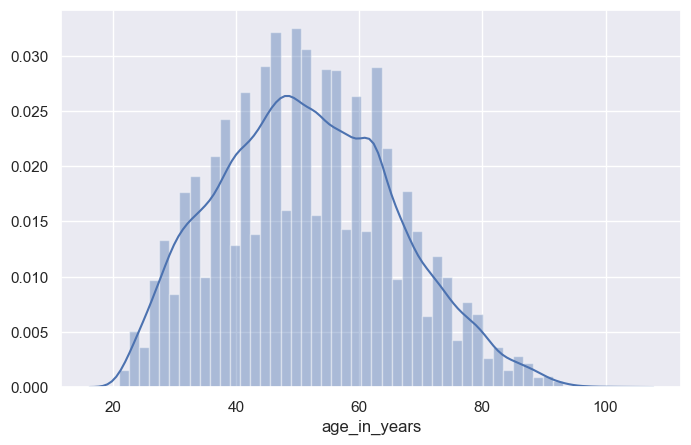

In [14]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.distplot(data.age_in_years)

#### target vs age_in_years

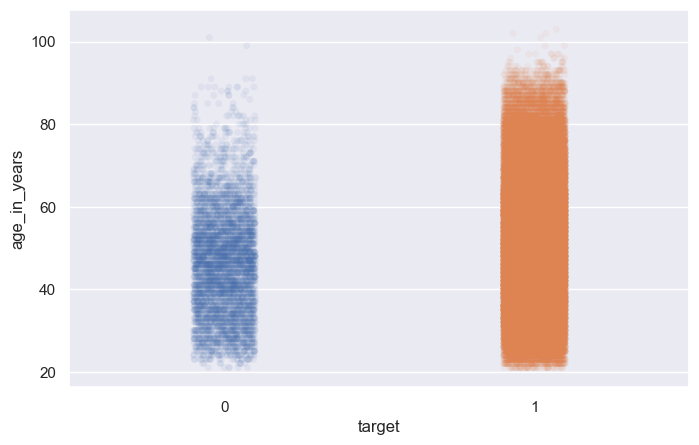

In [15]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.stripplot(x=data['target'],y=data['age_in_years'],jitter=True, dodge=True, alpha=0.075);

## Income

In [16]:
pd.options.display.float_format = '{:.4f}'.format
data.Income.describe(percentiles=[0,0.25,0.5,0.75,0.9,0.99,1])

count      79853.0000
mean      208847.1712
std       496582.5973
min        24030.0000
0%         24030.0000
25%       108010.0000
50%       166560.0000
75%       252090.0000
90%       357414.0000
99%       771078.0000
100%    90262600.0000
max     90262600.0000
Name: Income, dtype: float64

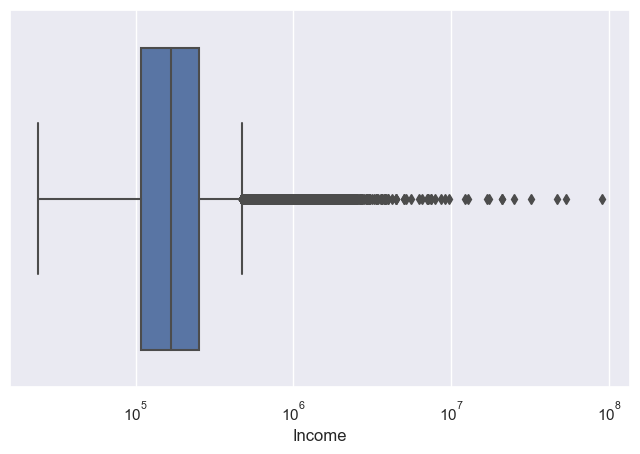

In [17]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(data.Income);
plt.xscale('log')

## Count_3-6_months_late

In [18]:
data['Count_3-6_months_late'].describe()

count   79756.0000
mean        0.2487
std         0.6915
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max        13.0000
Name: Count_3-6_months_late, dtype: float64

In [19]:
data['Count_3-6_months_late'] = data['Count_3-6_months_late'].fillna(0)

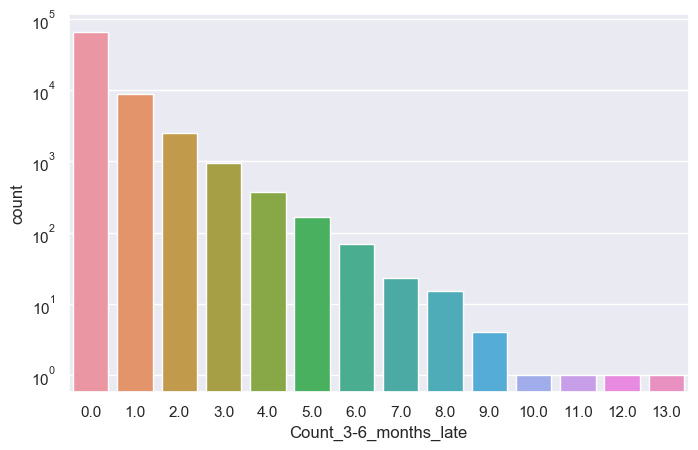

In [20]:
sns.countplot(data['Count_3-6_months_late']);
sns.set(rc={'figure.figsize':(8,5)})
plt.yscale('log')

#### target vs Count_3-6_months_late

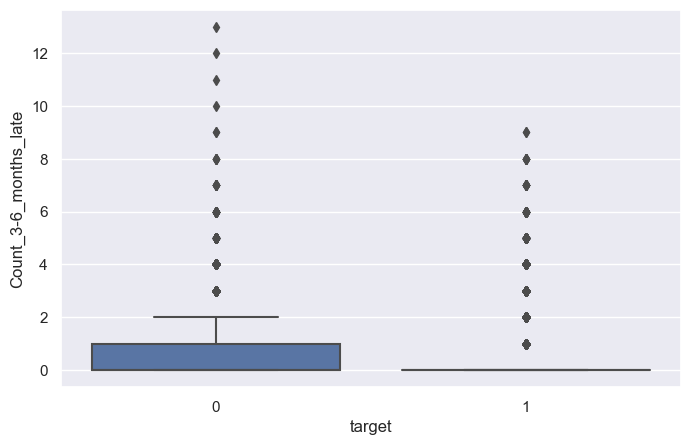

In [21]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(data['target'],data['Count_3-6_months_late']);

In [22]:
data.loc[data.target == 1,'Count_3-6_months_late'].value_counts()

0.0000    64211
1.0000     7673
2.0000     1927
3.0000      666
4.0000      216
5.0000      101
6.0000       37
7.0000       13
8.0000        9
9.0000        2
Name: Count_3-6_months_late, dtype: int64

In [23]:
data.loc[data.target == 0,'Count_3-6_months_late'].value_counts()

0.0000     2687
1.0000     1153
2.0000      592
3.0000      288
4.0000      158
5.0000       67
6.0000       31
7.0000       10
8.0000        6
9.0000        2
10.0000       1
11.0000       1
12.0000       1
13.0000       1
Name: Count_3-6_months_late, dtype: int64

## Count_6-12_months_late

In [24]:
data['Count_6-12_months_late'].describe()

count   79756.0000
mean        0.0782
std         0.4365
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max        17.0000
Name: Count_6-12_months_late, dtype: float64

In [25]:
data['Count_6-12_months_late'] = data['Count_6-12_months_late'].fillna(0)

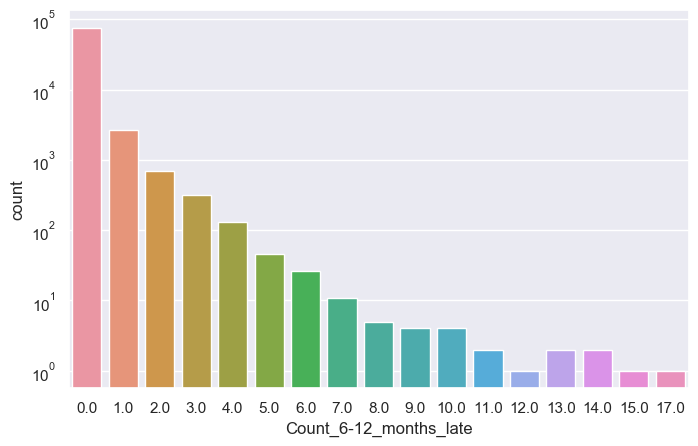

In [26]:
sns.countplot(data['Count_6-12_months_late']);
plt.yscale('log')

#### target vs Count_6-12_months_late

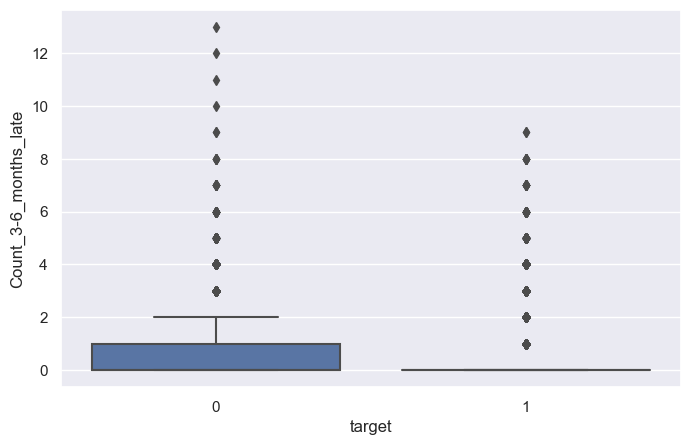

In [27]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(data['target'],data['Count_3-6_months_late']);

In [28]:
data.loc[data.target == 0,'Count_6-12_months_late'].value_counts()

0.0000     3505
1.0000      828
2.0000      334
3.0000      185
4.0000       85
5.0000       30
6.0000       13
7.0000        7
8.0000        3
9.0000        2
17.0000       1
12.0000       1
13.0000       1
14.0000       1
11.0000       1
10.0000       1
Name: Count_6-12_months_late, dtype: int64

In [29]:
data.loc[data.target == 1,'Count_6-12_months_late'].value_counts()

0.0000     72423
1.0000      1852
2.0000       359
3.0000       132
4.0000        45
5.0000        16
6.0000        13
7.0000         4
10.0000        3
9.0000         2
8.0000         2
15.0000        1
13.0000        1
11.0000        1
14.0000        1
Name: Count_6-12_months_late, dtype: int64

## Count_more_than_12_months_late

In [30]:
data['Count_more_than_12_months_late'].describe()

count   79756.0000
mean        0.0600
std         0.3120
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max        11.0000
Name: Count_more_than_12_months_late, dtype: float64

In [31]:
data['Count_more_than_12_months_late'] = data['Count_more_than_12_months_late'].fillna(0)

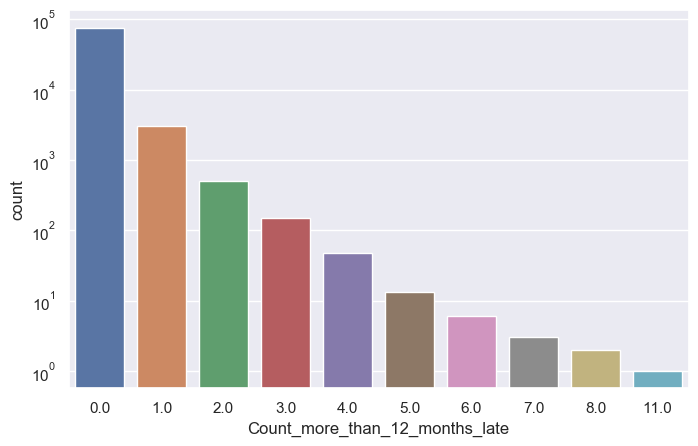

In [32]:
sns.countplot(data['Count_more_than_12_months_late']);
plt.yscale('log')

#### target vs Count_more_than_12_months_late

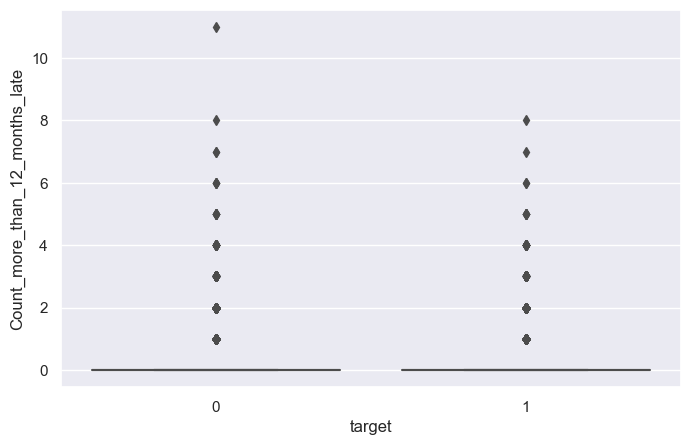

In [33]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(data['target'],data['Count_more_than_12_months_late'])

In [34]:
data.loc[data.target == 0,'Count_more_than_12_months_late'].value_counts()

0.0000     3810
1.0000      835
2.0000      228
3.0000       85
4.0000       25
5.0000        7
6.0000        4
7.0000        2
8.0000        1
11.0000       1
Name: Count_more_than_12_months_late, dtype: int64

In [35]:
data.loc[data.target == 1,'Count_more_than_12_months_late'].value_counts()

0.0000    72325
1.0000     2161
2.0000      270
3.0000       66
4.0000       23
5.0000        6
6.0000        2
7.0000        1
8.0000        1
Name: Count_more_than_12_months_late, dtype: int64

#### Creating new columns for data representation

In [36]:
data['3_plus_late'] = data['Count_more_than_12_months_late'] + data['Count_6-12_months_late'] + data['Count_3-6_months_late']
    
data['6_plus_late'] = data['Count_more_than_12_months_late'] + data['Count_6-12_months_late']
    
data['Count_3-12_months_late'] = data['Count_6-12_months_late'] + data['Count_3-6_months_late']

## No_of_premiums_paid

In [37]:
data['no_of_premiums_paid'].describe()

count   79853.0000
mean       10.8639
std         5.1707
min         2.0000
25%         7.0000
50%        10.0000
75%        14.0000
max        60.0000
Name: no_of_premiums_paid, dtype: float64

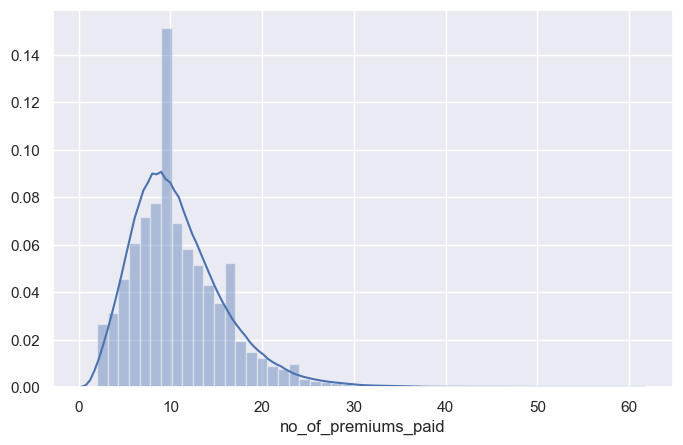

In [38]:
sns.distplot(data['no_of_premiums_paid'])

## Finding Total Number of Premiums paid

In [39]:
data['Count_premium_paid'] = data['no_of_premiums_paid'] + (data['Count_more_than_12_months_late'] + data['Count_6-12_months_late'] + data['Count_3-6_months_late']) 


In [40]:
data['Count_premium_paid'].describe()

count   79853.0000
mean       11.2503
std         5.2805
min         2.0000
25%         8.0000
50%        10.0000
75%        14.0000
max        60.0000
Name: Count_premium_paid, dtype: float64

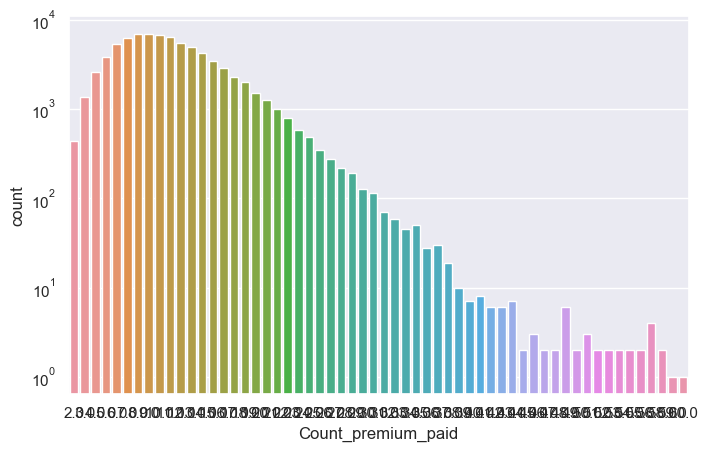

In [41]:
sns.countplot(data['Count_premium_paid'])
sns.set(rc={'figure.figsize':(8,5)})
plt.yscale('log')

#### target vs Count_premium_paid

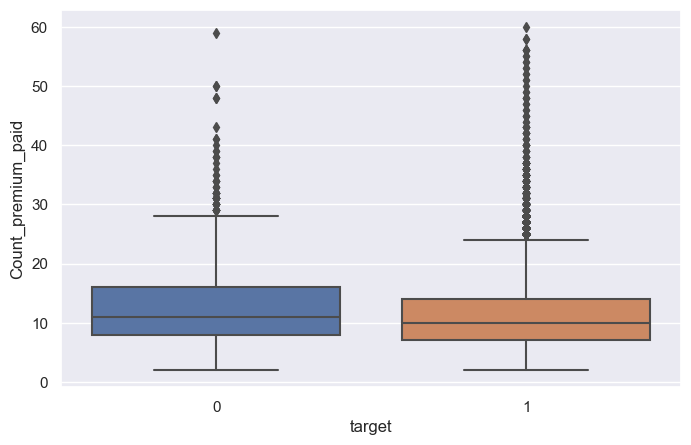

In [42]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(data['target'],data['Count_premium_paid']);

In [43]:
data['perc_paid_late'] = data['3_plus_late'] / data['Count_premium_paid']
data['perc_paid_late']

0       0.0000
1       0.0000
2       0.4615
3       0.0000
4       0.0000
         ...  
79848   0.0500
79849   0.1429
79850   0.0000
79851   0.0000
79852   0.2000
Name: perc_paid_late, Length: 79853, dtype: float64

#### target vs perc_paid_late

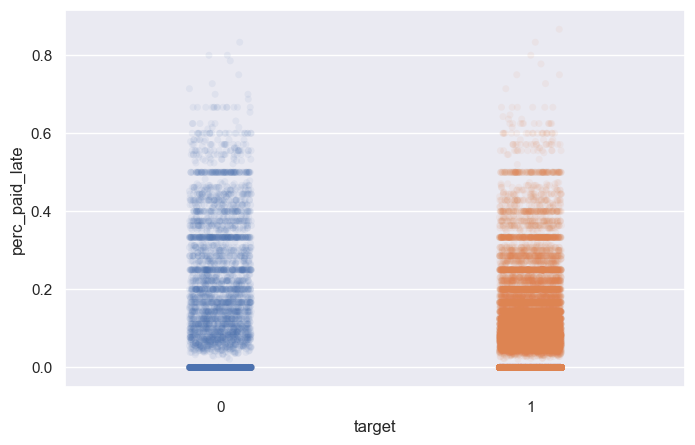

In [44]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.stripplot(x=data['target'],y=data['perc_paid_late'],jitter=True, dodge=True, alpha=0.075);

In [45]:
data['perc_paid_ontime'] = data['no_of_premiums_paid'] / data['Count_premium_paid']
data['perc_paid_ontime']

0       1.0000
1       1.0000
2       0.5385
3       1.0000
4       1.0000
         ...  
79848   0.9500
79849   0.8571
79850   1.0000
79851   1.0000
79852   0.8000
Name: perc_paid_ontime, Length: 79853, dtype: float64

#### target vs perc_paid_ontime

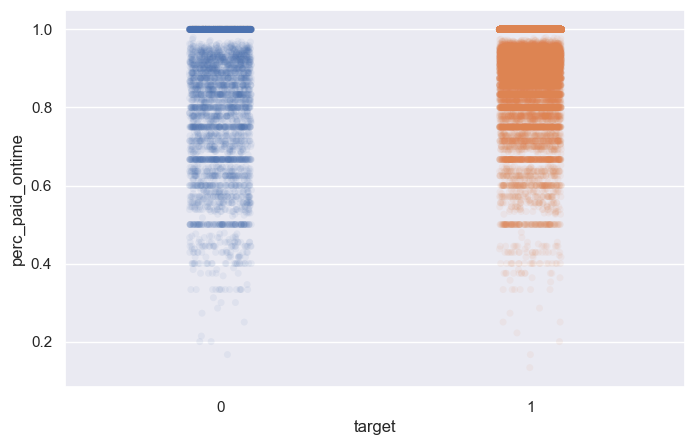

In [46]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.stripplot(x=data['target'],y=data['perc_paid_ontime'],jitter=True, dodge=True, alpha=0.075);

In [47]:
data['ratio_late_ontime'] = data['3_plus_late'] / data['no_of_premiums_paid']
data['ratio_late_ontime']

0       0.0000
1       0.0000
2       0.8571
3       0.0000
4       0.0000
         ...  
79848   0.0526
79849   0.1667
79850   0.0000
79851   0.0000
79852   0.2500
Name: ratio_late_ontime, Length: 79853, dtype: float64

#### target vs ratio_late_ontime

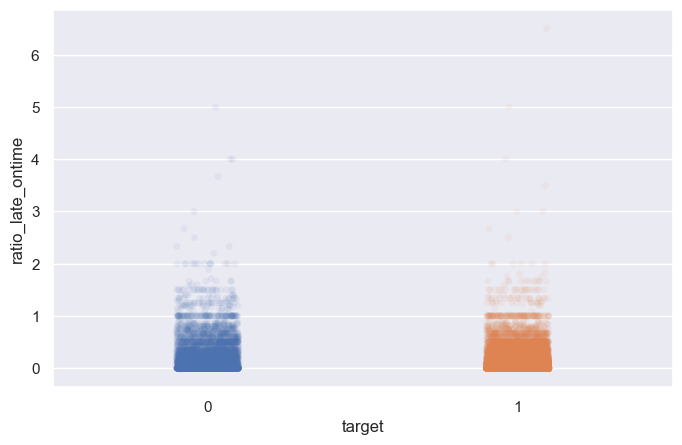

In [48]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.stripplot(x=data['target'],y=data['ratio_late_ontime'],jitter=True, dodge=True, alpha=0.075);

## perc_premium_paid_by_cash_credit

In [49]:
pd.options.display.float_format = '{:.4f}'.format
data.perc_premium_paid_by_cash_credit.describe(percentiles=[0,.25,.5,.75,.9,1])

count   79853.0000
mean        0.3143
std         0.3349
min         0.0000
0%          0.0000
25%         0.0340
50%         0.1670
75%         0.5380
90%         0.9250
100%        1.0000
max         1.0000
Name: perc_premium_paid_by_cash_credit, dtype: float64

In [50]:
data.query('perc_premium_paid_by_cash_credit==1')['target'].value_counts()

1    4025
0     979
Name: target, dtype: int64

In [51]:
data.query('perc_premium_paid_by_cash_credit==1')['target'].value_counts()

1    4025
0     979
Name: target, dtype: int64

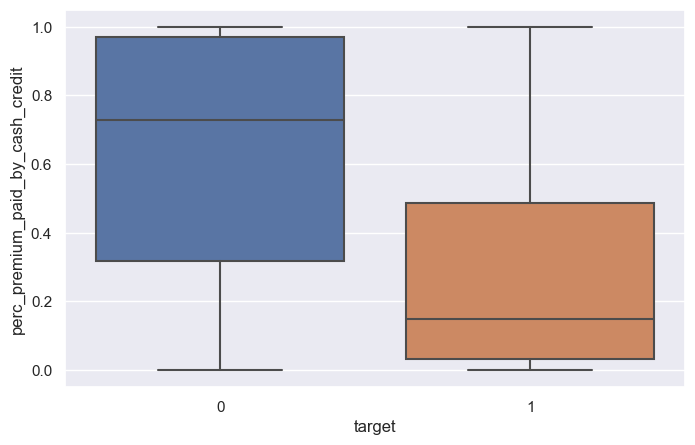

In [52]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(y='perc_premium_paid_by_cash_credit',x='target',data=data);

In [53]:
data['per_payment_perc'] = data['perc_premium_paid_by_cash_credit'] / data['Count_premium_paid']
data['per_payment_perc']

0       0.0330
1       0.0005
2       0.0705
3       0.0054
4       0.0043
         ...  
79848   0.0212
79849   0.0503
79850   0.0000
79851   0.0497
79852   0.0550
Name: per_payment_perc, Length: 79853, dtype: float64

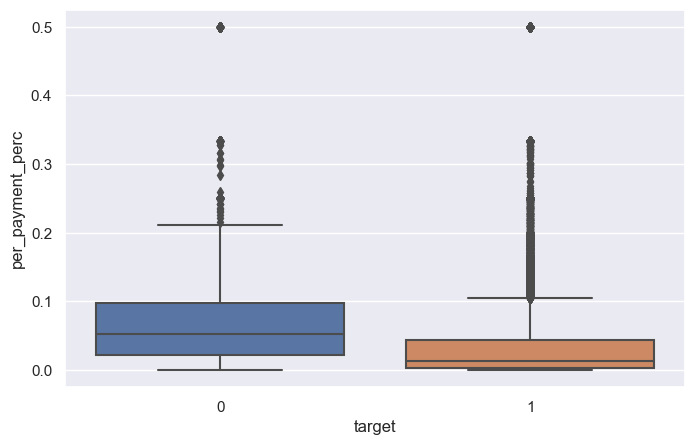

In [54]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(y='per_payment_perc',x='target',data=data);

In [55]:
data['remaining_perc'] = 1 - data['perc_premium_paid_by_cash_credit']
data['remaining_perc']

0       0.5710
1       0.9900
2       0.0830
3       0.9510
4       0.9480
         ...  
79848   0.5750
79849   0.2960
79850   1.0000
79851   0.6020
79852   0.4500
Name: remaining_perc, Length: 79853, dtype: float64

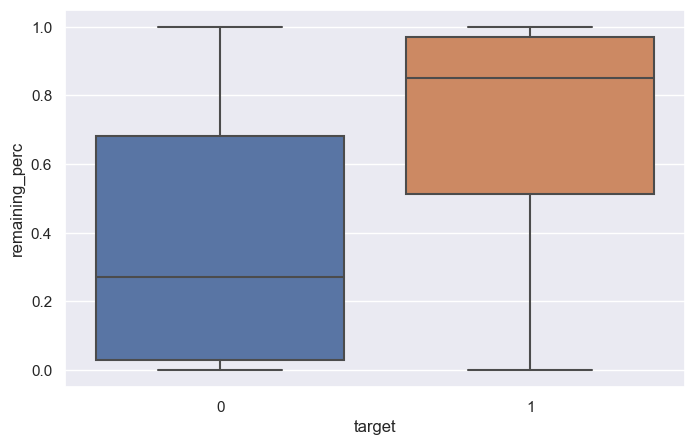

In [56]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.boxplot(y='remaining_perc',x='target',data=data);

In [57]:
data['late_payments_0-1'] = data['3_plus_late'].apply( lambda x: 1 if x>0 else 0)
data['late_payments_0-1']

0        0
1        0
2        1
3        0
4        0
        ..
79848    1
79849    1
79850    0
79851    0
79852    1
Name: late_payments_0-1, Length: 79853, dtype: int64

In [58]:
data = data.drop(['perc_premium_paid_by_cash_credit'],axis=1)

## application_underwriting_score

In [59]:
data['application_underwriting_score'].describe()

count   76879.0000
mean       99.0673
std         0.7398
min        91.9000
25%        98.8100
50%        99.2100
75%        99.5400
max        99.8900
Name: application_underwriting_score, dtype: float64

In [60]:
data['application_underwriting_score'] = data['application_underwriting_score'].fillna(data['application_underwriting_score'].mean())

In [61]:
data['application_underwriting_score'] = data['application_underwriting_score'] - 90
#normalizing the score

#### target vs application_underwriting_score

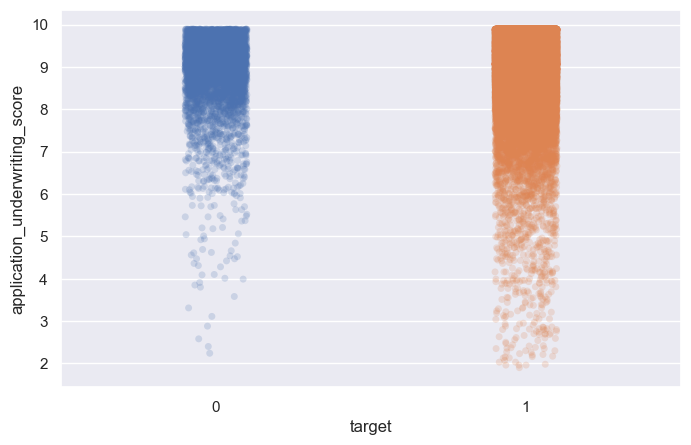

In [62]:
sns.set(rc={'figure.figsize':(8,5), 'figure.dpi':100})
sns.stripplot(x=data['target'],y=data['application_underwriting_score'],jitter=True, dodge=True, alpha=0.2);

## sourcing_channel

In [63]:
data['sourcing_channel'].describe()

count     79853
unique        5
top           A
freq      43134
Name: sourcing_channel, dtype: object

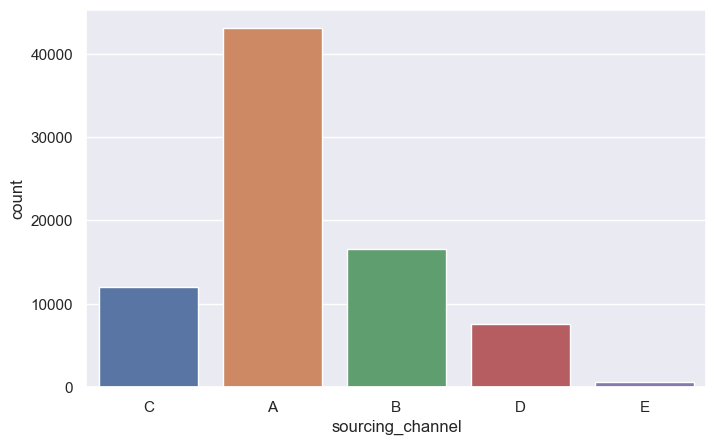

In [64]:
sns.countplot(data['sourcing_channel']);

In [65]:
data['sourcing_channel'] = pd.get_dummies(data['sourcing_channel'])

## residence_area_type

In [66]:
data['residence_area_type'].describe()

count     79853
unique        2
top       Urban
freq      48183
Name: residence_area_type, dtype: object

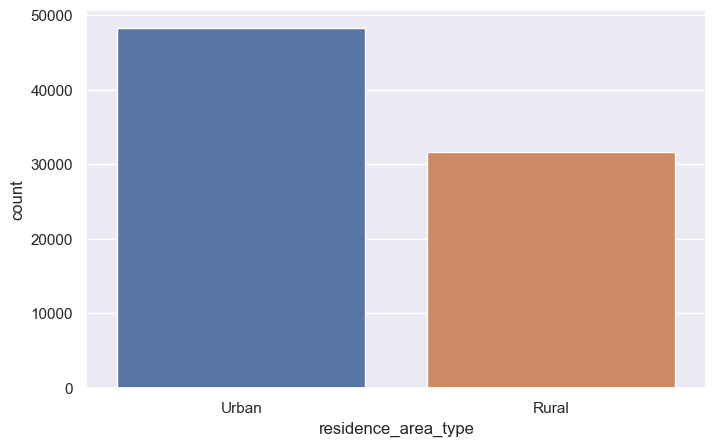

In [67]:
sns.countplot(data['residence_area_type'])


In [68]:
data['residence_area_type'] = pd.get_dummies(data['residence_area_type'])

## Data description

In [69]:
data.head()

,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target,age_in_years,3_plus_late,6_plus_late,Count_3-12_months_late,Count_premium_paid,perc_paid_late,perc_paid_ontime,ratio_late_ontime,per_payment_perc,remaining_perc,late_payments_0-1
0,355060,0.0000,0.0000,0.0000,9.0200,13,0,0,1,33,0.0000,0.0000,0.0000,13.0000,0.0000,1.0000,0.0000,0.0330,0.5710,0
1,315150,0.0000,0.0000,0.0000,9.8900,21,1,0,1,59,0.0000,0.0000,0.0000,21.0000,0.0000,1.0000,0.0000,0.0005,0.9900,0
2,84140,2.0000,3.0000,1.0000,8.6900,7,0,1,0,48,6.0000,4.0000,5.0000,13.0000,0.4615,0.5385,0.8571,0.0705,0.0830,1
3,250510,0.0000,0.0000,0.0000,9.5700,9,1,0,1,42,0.0000,0.0000,0.0000,9.0000,0.0000,1.0000,0.0000,0.0054,0.9510,0
4,198680,0.0000,0.0000,0.0000,9.8700,12,0,0,1,86,0.0000,0.0000,0.0000,12.0000,0.0000,1.0000,0.0000,0.0043,0.9480,0


In [70]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,79853.0000,208847.1712,496582.5973,24030.0000,108010.0000,166560.0000,252090.0000,90262600.0000
Count_3-6_months_late,79853.0000,0.2484,0.6911,0.0000,0.0000,0.0000,0.0000,13.0000
Count_6-12_months_late,79853.0000,0.0781,0.4363,0.0000,0.0000,0.0000,0.0000,17.0000
Count_more_than_12_months_late,79853.0000,0.0599,0.3118,0.0000,0.0000,0.0000,0.0000,11.0000
application_underwriting_score,79853.0000,9.0673,0.7259,1.9000,8.8300,9.1800,9.5200,9.8900
no_of_premiums_paid,79853.0000,10.8639,5.1707,2.0000,7.0000,10.0000,14.0000,60.0000
sourcing_channel,79853.0000,0.5402,0.4984,0.0000,0.0000,1.0000,1.0000,1.0000
residence_area_type,79853.0000,0.3966,0.4892,0.0000,0.0000,0.0000,1.0000,1.0000
target,79853.0000,0.9374,0.2422,0.0000,1.0000,1.0000,1.0000,1.0000
age_in_years,79853.0000,51.6074,14.2705,21.0000,41.0000,51.0000,62.0000,103.0000


In [71]:
data.isnull().sum()

Income                            0
Count_3-6_months_late             0
Count_6-12_months_late            0
Count_more_than_12_months_late    0
application_underwriting_score    0
no_of_premiums_paid               0
sourcing_channel                  0
residence_area_type               0
target                            0
age_in_years                      0
3_plus_late                       0
6_plus_late                       0
Count_3-12_months_late            0
Count_premium_paid                0
perc_paid_late                    0
perc_paid_ontime                  0
ratio_late_ontime                 0
per_payment_perc                  0
remaining_perc                    0
late_payments_0-1                 0
dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Income                          79853 non-null  int64  
 1   Count_3-6_months_late           79853 non-null  float64
 2   Count_6-12_months_late          79853 non-null  float64
 3   Count_more_than_12_months_late  79853 non-null  float64
 4   application_underwriting_score  79853 non-null  float64
 5   no_of_premiums_paid             79853 non-null  int64  
 6   sourcing_channel                79853 non-null  uint8  
 7   residence_area_type             79853 non-null  uint8  
 8   target                          79853 non-null  int64  
 9   age_in_years                    79853 non-null  int64  
 10  3_plus_late                     79853 non-null  float64
 11  6_plus_late                     79853 non-null  float64
 12  Count_3-12_months_late          

In [73]:
c_m = data.corr()
c_m['target'].sort_values()

perc_paid_late                   -0.3601
3_plus_late                      -0.3533
ratio_late_ontime                -0.3332
Count_3-12_months_late           -0.3308
6_plus_late                      -0.3305
Count_6-12_months_late           -0.2840
late_payments_0-1                -0.2728
Count_3-6_months_late            -0.2465
Count_more_than_12_months_late   -0.2385
per_payment_perc                 -0.1588
Count_premium_paid               -0.0476
residence_area_type              -0.0017
Income                            0.0165
no_of_premiums_paid               0.0227
sourcing_channel                  0.0364
application_underwriting_score    0.0673
age_in_years                      0.0951
remaining_perc                    0.2410
perc_paid_ontime                  0.3601
target                            1.0000
Name: target, dtype: float64

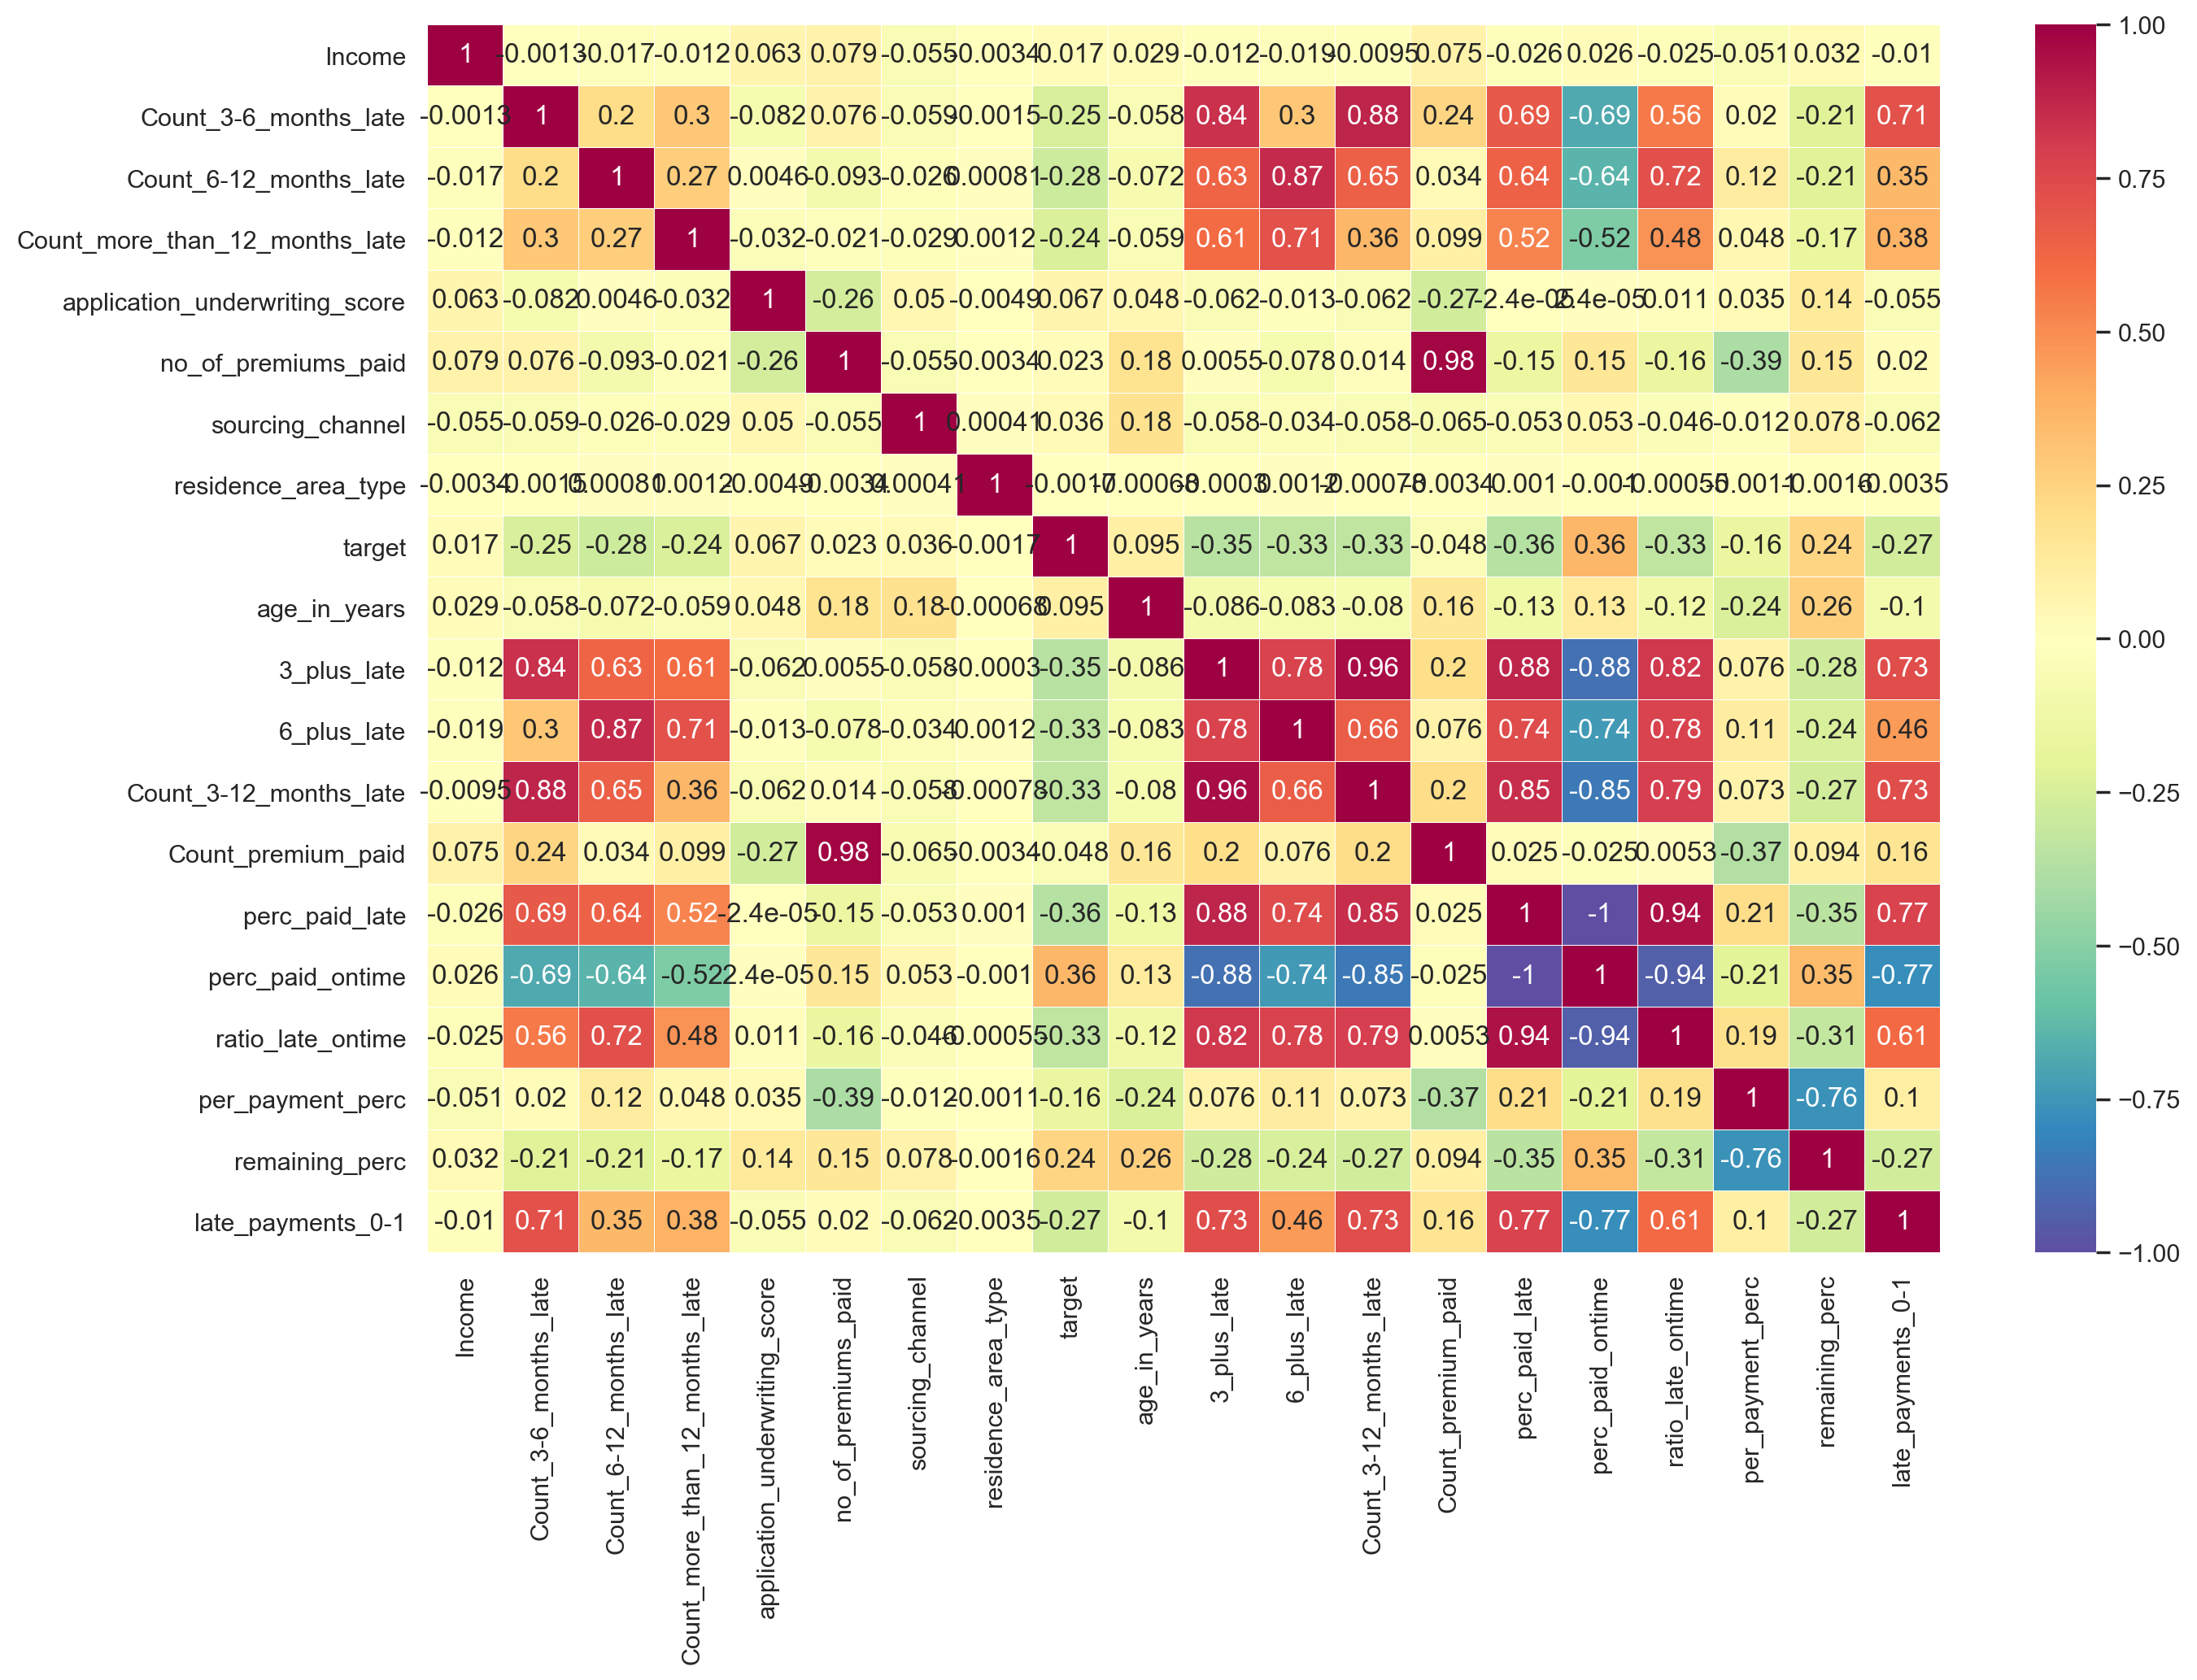

In [74]:
sns.set(rc={'figure.figsize':(15,10), 'figure.dpi':200})
cr = data.corr()
with sns.axes_style("whitegrid"):
    sns.heatmap( cr, cmap='Spectral_r', annot=True, square=False, linewidth=.1);

## Testing on LightGBMClassifier

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

In [77]:
X_train

,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age_in_years,3_plus_late,6_plus_late,Count_3-12_months_late,Count_premium_paid,perc_paid_late,perc_paid_ontime,ratio_late_ontime,per_payment_perc,remaining_perc,late_payments_0-1
66266,263690,0.0000,0.0000,0.0000,9.4100,7,0,1,56,0.0000,0.0000,0.0000,7.0000,0.0000,1.0000,0.0000,0.0071,0.9500,0
22396,198030,0.0000,1.0000,0.0000,9.7500,5,0,0,73,1.0000,1.0000,1.0000,6.0000,0.1667,0.8333,0.2000,0.0118,0.9290,1
6363,226900,0.0000,0.0000,0.0000,8.4700,22,0,0,61,0.0000,0.0000,0.0000,22.0000,0.0000,1.0000,0.0000,0.0404,0.1120,0
59464,90060,0.0000,0.0000,0.0000,9.0673,8,1,1,78,0.0000,0.0000,0.0000,8.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0
77116,27710,1.0000,0.0000,0.0000,3.0800,11,0,0,32,1.0000,0.0000,1.0000,12.0000,0.0833,0.9167,0.0909,0.0247,0.7040,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18751,690050,2.0000,0.0000,0.0000,9.6900,15,1,1,62,2.0000,0.0000,2.0000,17.0000,0.1176,0.8824,0.1333,0.0405,0.3110,1
13450,475140,0.0000,0.0000,0.0000,9.7300,3,1,0,57,0.0000,0.0000,0.0000,3.0000,0.0000,1.0000,0.0000,0.3260,0.0220,0
19322,75130,0.0000,0.0000,0.0000,9.5100,15,1,1,46,0.0000,0.0000,0.0000,15.0000,0.0000,1.0000,0.0000,0.0083,0.8750,0
53947,93110,0.0000,0.0000,0.0000,9.5100,7,1,0,27,0.0000,0.0000,0.0000,7.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0


In [78]:
X_test

,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,age_in_years,3_plus_late,6_plus_late,Count_3-12_months_late,Count_premium_paid,perc_paid_late,perc_paid_ontime,ratio_late_ontime,per_payment_perc,remaining_perc,late_payments_0-1
43605,175080,0.0000,0.0000,0.0000,8.9100,16,1,1,55,0.0000,0.0000,0.0000,16.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0
36979,209370,0.0000,0.0000,0.0000,8.8500,7,0,0,45,0.0000,0.0000,0.0000,7.0000,0.0000,1.0000,0.0000,0.0484,0.6610,0
20378,228380,0.0000,0.0000,0.0000,9.4100,8,0,1,46,0.0000,0.0000,0.0000,8.0000,0.0000,1.0000,0.0000,0.0262,0.7900,0
11582,115790,0.0000,0.0000,0.0000,8.6700,14,0,0,46,0.0000,0.0000,0.0000,14.0000,0.0000,1.0000,0.0000,0.0012,0.9830,0
33733,375150,0.0000,0.0000,0.0000,9.7600,10,1,0,64,0.0000,0.0000,0.0000,10.0000,0.0000,1.0000,0.0000,0.0051,0.9490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,211720,0.0000,0.0000,0.0000,9.4400,6,0,1,46,0.0000,0.0000,0.0000,6.0000,0.0000,1.0000,0.0000,0.1017,0.3900,0
9630,240040,0.0000,0.0000,0.0000,9.6500,7,0,1,49,0.0000,0.0000,0.0000,7.0000,0.0000,1.0000,0.0000,0.0014,0.9900,0
6799,344860,1.0000,0.0000,0.0000,9.3600,6,1,1,58,1.0000,0.0000,1.0000,7.0000,0.1429,0.8571,0.1667,0.0000,1.0000,1
36432,133630,0.0000,0.0000,0.0000,8.8100,9,0,1,64,0.0000,0.0000,0.0000,9.0000,0.0000,1.0000,0.0000,0.1017,0.0850,0


In [79]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [80]:
model = LGBMClassifier(random_state=101, min_class_weight = 0.3,min_split_gain=0.4, min_child_weight=0.3,reg_alpha=0.1,reg_lambda=0.15)

In [81]:
model.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.3, min_class_weight=0.3,
               min_split_gain=0.4, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=101, reg_alpha=0.1, reg_lambda=0.15,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [82]:
pred = model.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [83]:
model.score(X_test,y_test)

0.9380113541492736

In [84]:
from sklearn.metrics import classification_report


In [85]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.12      0.20      1510
           1       0.94      0.99      0.97     22446

    accuracy                           0.94     23956
   macro avg       0.74      0.56      0.58     23956
weighted avg       0.92      0.94      0.92     23956



## Testing on Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc = RandomForestClassifier()

In [88]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
pred_rfc = rfc.predict(X_test)
pred_rfc

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [90]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.46      0.15      0.23      1510
           1       0.95      0.99      0.97     22446

    accuracy                           0.94     23956
   macro avg       0.70      0.57      0.60     23956
weighted avg       0.92      0.94      0.92     23956



## Testing on Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
lr = LogisticRegression()

In [93]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
pred_lr = lr.predict(X_test)
pred_lr

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [95]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1510
           1       0.94      1.00      0.97     22446

    accuracy                           0.94     23956
   macro avg       0.47      0.50      0.48     23956
weighted avg       0.88      0.94      0.91     23956



C:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Testing on Linear Discriminant Analysis

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [97]:
lda = LinearDiscriminantAnalysis()

In [98]:
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [99]:
pred_lda = lda.predict(X_test)
pred_lda

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [100]:
print(classification_report(y_test,pred_lda))

              precision    recall  f1-score   support

           0       0.42      0.30      0.35      1510
           1       0.95      0.97      0.96     22446

    accuracy                           0.93     23956
   macro avg       0.69      0.64      0.66     23956
weighted avg       0.92      0.93      0.92     23956



In [101]:
clda = classification_report(y_test,pred_lda)

NameError: name 'plot_classification_report' is not defined